<a href="https://colab.research.google.com/github/tsparaskevas/ML_EDDE2/blob/main/Animals/Homework3%CE%91_movies_Paraskevas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Έχουμε ένα αρχείο .csv το οποίο περιέχει τις καλύτερες 1000 ταινίες του IMDB και θα χρησιμοποιήσουμε αυτά τα δεδομένα για να οπτικοποιήσουμε και να πραγματοποιήσουμε κάποιες αναλύσεις σε αυτ'α χρησιμοποιώντας την Python και τη βιβλιοθήκη των Pandas που μάθαμε πρόσφατα.



Θα χρησιμοποιήσουμε τη μορφή Jupyter Notebook που μας παρέχει το περιβάλλον Collab της Google, για να φτιάξουμε τον κώδικά μας. Το πρώτο πράγμα είναι κάνουμε εισαγωγή (import) τις βιβλιοθήκες μας Pandas και Matplot. Pandas για τα dataframes και την ανάλυσή μας και τη Matplot για την οπτικοποίησή μας.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Εισάγουμε τα δεδομένα μας από έναν λογαριασμό στο github

In [2]:
movies  = pd.read_csv("https://raw.githubusercontent.com/thechaudharysab/imdb-data-pandas-visualization/master/data/imdb_1000.csv")

In [3]:
movies.head() #βλέπουμε τις 5 πρώτες γραμμές των δεδομένων μας

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
# Ελέγχουμε τις γραμμές και τις στήλες του πίνακά μας (του dataframe ορθότερα) 
movies.shape


(979, 6)

In [5]:
# Ελέγχουμε τον τύπο δεδομένων της κάθε στήλης
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [6]:
# Ελέγχουμε τα στατιστικά στοιχεία
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [7]:
# υπολογίζουμε τη μέση διάρκεια όλων των ταινιών

movies['duration'].mean()

120.97957099080695

In [8]:
# ταξινομούμε το DataFrame ως προς τη διάρκεια για να βρούμε τη μικρότερη και τη μεγαλύτερη σε διάρκεια ταινία

movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


In [9]:
# Η πιο μικρή σε διάρκεια ταινία

movies.sort_values('duration', ascending = True).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [10]:
# Η πιο μεγάλη σε διάρκεια ταινία

movies.sort_values('duration',ascending = False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


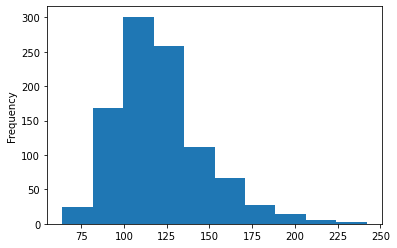

In [11]:
# δημιουργούμε ένα ιστόγραμμα με τις συχνότητες των ταινιών σε διάρκεια, επιλέγοντας έναν “κατάλληλο” αριθμό bins (ομάδων)

movies['duration'].plot(kind='hist', bins=10)

Μπορούμε πριν κάνουμε το γράφημα να υπολογίσουμε τον "κατάλληλο" αριθμό των bins

Freedman–Diaconis number of bins: 28


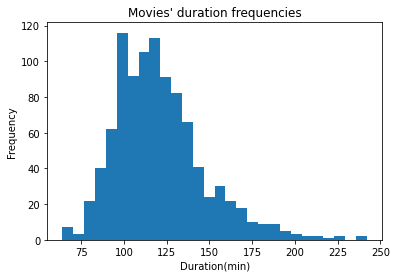

In [12]:
# Εισάγουμε τη βιβλιοθήκη numpy
import numpy as np
x = movies.duration # ορίζουμε τη μεταβλητή που θέλουμε να απεικονίσουμε (το duration)
# Υπολογίζουμε τα bins κατά Freedman-Diacosis 
q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
bins = round((x.max() - x.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins) # Εκτύπωση του κατάλληλου αριθμού bins
#Φτιάχνουμε το ιστόγραμμα με τη matplotlib
plt.hist(x, bins=bins)
plt.ylabel('Frequency')
plt.xlabel('Duration(min)')
plt.title('Movies\' duration frequencies');

Εναλλακτικά, με την ευκολία της seaborn, μπορούμε να πάρουμε το ίδιο γράφημα με μία γραμμή κώδικα

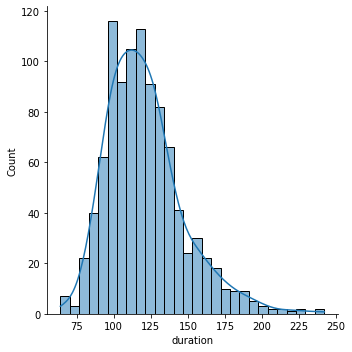

In [13]:
import seaborn as sns
sns.displot(x, bins=28, kde=True);

Αυτό είναι ένα από τα πλεονεκτήματα της χρήσης της οπτικοποίησης για δεδομένα έτσι ώστε εύκολα να διαπιστώσεις διαφοροποιήσεις στα δεδομένα.
Υπάρχουν πολλοί τρόποι οπτικοποίησης που μπορείς να χρησιμοποιήσεις. Εξαρτάται από τον τύπο δεδομένων καθώς μπορεί ένα ιστόγραμμα να μην είναι πάντα κατάλληλο ως είδος διαγράμματος και να μην ταιριάζει για τν ανάλυση που ζητάς.


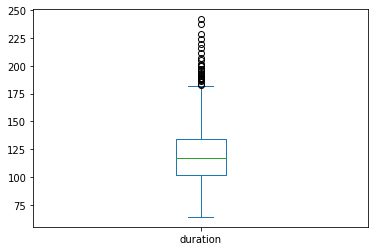

In [14]:
# χρησιμοποίησε ένα box διάγραμμα για την παρουσίαση των ίδιων δεδομένων...
 
movies['duration'].plot(kind='box')

Το παραπάνω διάγραμμα τύπου box  μας δίνει την ίδια πληροφορία δλδ ότι οι περισσότερες ταινίες διαρκούν μεταξύ 110 και 135 και επίσης έχουμε μία διάμεσο (median). Ενώ, με το ιστόγραμμα δεν μπορούμε να έχουμε καθαρά την διάμεσο τιμή. 

Ας συνεχίσουμε τους πειραματισμούς στις αναλύσεις και τις οπτικοποιήσεις κάνοντας χρήση των pandas.


In [15]:
# Ας δούμε ποιές είναι οι μοναδικές τιμές της μεταβλητής content_rating
movies.content_rating.unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [16]:
# Ας μετρήσουμε πόσες ταινίες έχουν καθεμία από τις βαθμολογίες περιεχομένου (content ratings)
movies[['content_rating','title']].groupby('content_rating').count()

,title
content_rating,
APPROVED,47
G,32
GP,3
NC-17,7
NOT RATED,65
PASSED,7
PG,123
PG-13,189
R,460


Ας δούμε διαγραμματικά την παραπάνω πληροφορίες...
 

Text(0, 0.5, 'Title Count')

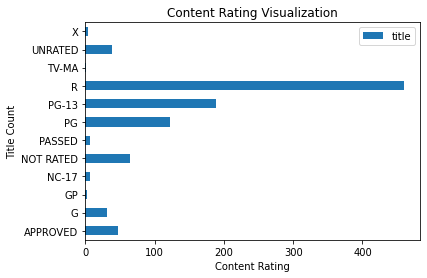

In [17]:
# Ας χρησιμοποιήσουμε ένα διάγραμμα τύπου στήλης (bar diagram) για να παρουσιάσουμε τα αποτελέσματα, 
# συμπεριλαμβανομένων  και των τίτλων του άξονα x και y...
movies[['content_rating','title']].groupby('content_rating').count().plot(kind='barh', title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

# Παρακάτω έχουμε περισσότερες αναλύσεις πάνω στα δεδομένα μας...


In [18]:
# μετατράπουμε τις βαθμολογίες τύπου  X και  TV-MA σε “NC-17”: 
movies['content_rating'].replace(['X','TV-MA'],'NC-17').head()

0        R
1        R
2        R
3    PG-13
4        R
Name: content_rating, dtype: object

# Ερευνούμε αν στα δεδομένα μας υπάρχουν τιμές που λείπουν (missing value(s))

In [19]:
# Ας μετρήσουμε τις τιμές που λείπουν σε κάθε στ'ηλη
movies.isnull().sum(axis=0)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [20]:
# Βλέπουμε ότι υπάρχουν 3 missing values στη στήλη content_rating
# Ας δούμε ποιές λείπουν
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [21]:
# Βλέπουμε ότι λείπουν στις σειρές 187, 649 kai 936
# Αν τις συμπληρώσουμε με μια κατάλληλη τιμή
movies.at[(187,649),'content_rating'] = 'PG'
movies.at[936,'content_rating'] = 'PG-13'

Μπορούμε επίσης να επιλέξουμε γραμμές σύμφωνα με κάποια συνθήκη... Για παράδειγμα,


In [22]:
# υπολογίστε τη μέση βαθμολογία  (star rating) για ταινίες με διάρκεια μεγαλύτερη από 2 ώρες
# και συγκρίνετέ τη με τη μέση βαθμολογία των ταινιών με μικρότερη διάρκεια.
print('Avg. star rating for movies 2 hours or longer: ', movies[movies['duration'] >= 120]['star_rating'].mean(), 
 '\nAvg. star rating for movies shorter than 2 hours: ', movies[movies['duration'] < 120]['star_rating'].mean())

Avg. star rating for movies 2 hours or longer:  7.948898678414082 
Avg. star rating for movies shorter than 2 hours:  7.838666666666657


# Ας κάνουμε ένα γράφημα σχετικά με αυτό...


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


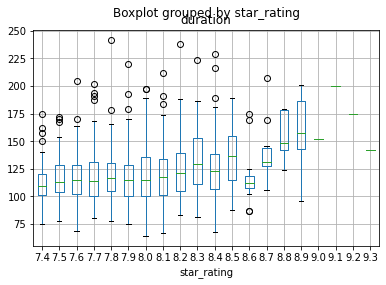

In [23]:
# ας φτιάξουμε ένα γράφημα για να δούμε αν υπάρχει συσχέτιση μεταξύ της διάρκειας μιας ταινίας
# και της βαθμολογίας της.
movies.boxplot(column='duration', by='star_rating');

In [24]:
# Ας υπολογίσουμε τη μέση διάρκεια σε κάθε κατηγορία
movies[['duration','genre']].groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


Ας το δούμε και αυτό γραφικά:

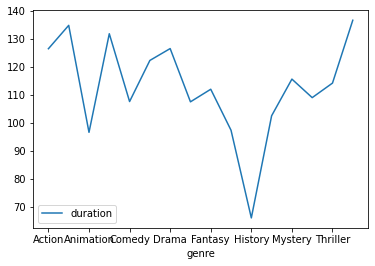

In [25]:
movies[['duration','genre']].groupby('genre').mean().plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


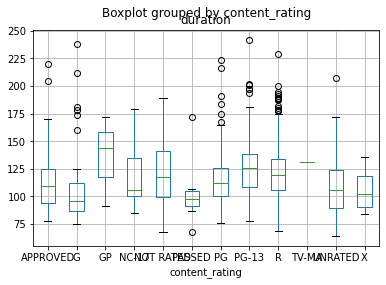

In [26]:
# βλέπουμε τη σχέση μεταξύ βαθμολογίας και content rating
movies.boxplot(column='duration', by='content_rating')

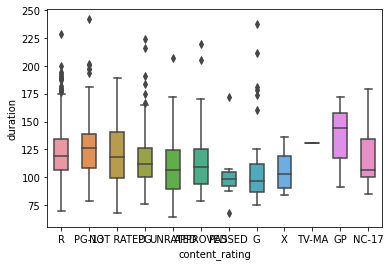

In [27]:
# Το ίδιο με τη seaborn
sns.boxplot(x = 'content_rating', y = 'duration', data = movies, width=0.5)

In [28]:
# Ας βρούμε τις καλύτερες ταινίες (by star rating) για κάθε κατηγορία (gender)
movies.sort_values('star_rating', ascending=False).groupby('genre')[['title','star_rating']].first()


,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


First keyword is used to get the first value from a list/array or any sort of storage list type.

Some more analytics this data can give.

In [29]:
# Ας υπολογίσουμε τη μέση βαθμολογία για κάθε κατηγορία
 
movies.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

# Κάντε κάποιες αναλύσεις και γραφήματα σχετικά με τα παραπάνω δεδομένα....

In [30]:
# Ξαναθυμάμαι τις μεταβλητές που περιέχουν τα δεδομένα (στήλες)
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [31]:
# Θέλω να δώ σε έναν πίνακα πόσες ταινίες περιέχει το κάθε είδος και τις μέσες τιμές α)των βαθμολογιών και β)της διάρκειας των ταινιών ανά είδος
movies.groupby(['genre']).agg({
  'title': 'count',
  'star_rating': 'mean',
  'duration': 'mean'
}).reset_index()

,genre,title,star_rating,duration
0,Action,136,7.884559,126.485294
1,Adventure,75,7.933333,134.840000
2,Animation,62,7.914516,96.596774
3,Biography,77,7.862338,131.844156
4,Comedy,156,7.822436,107.602564
5,Crime,124,7.916935,122.298387
6,Drama,278,7.902518,126.539568
7,Family,2,7.850000,107.500000
8,Fantasy,1,7.700000,112.000000
9,Film-Noir,3,8.033333,97.333333


In [32]:
# θέλω να δω τα ίδια στατιστικά ανά σήμανση περιεχομένου
movies.groupby(['content_rating']).agg({
  'title': 'count',
  'star_rating': 'mean',
  'duration': 'mean'
}).reset_index()

,content_rating,title,star_rating,duration
0,APPROVED,47,8.027660,113.914894
1,G,32,7.990625,112.343750
2,GP,3,7.933333,135.666667
3,NC-17,7,7.614286,119.857143
4,NOT RATED,65,8.123077,122.661538
5,PASSED,7,8.157143,104.285714
6,PG,125,7.880800,115.600000
7,PG-13,190,7.826316,127.200000
8,R,460,7.854783,122.163043
9,TV-MA,1,8.100000,131.000000


In [33]:
# θέλω να δω πώς κατανέμονται οι δραματικές ταινίες ως προς τη σήμανση περιεχομένου
movies[movies['genre'] == 'Drama'].groupby('content_rating')[['title']].count()


,title
content_rating,
APPROVED,12
G,3
NC-17,4
NOT RATED,24
PASSED,1
PG,25
PG-13,55
R,143
TV-MA,1


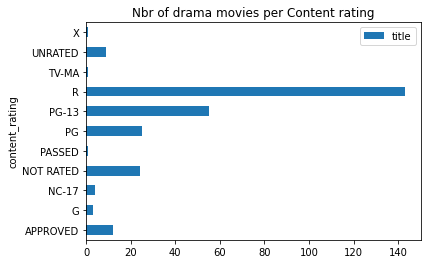

In [34]:
# Γράφημα του τρόπου κατανομής των δραματικών ταινιών ανά σήμανση περιεχομένου
movies[movies['genre'] == 'Drama'].groupby('content_rating')[['title']].count().plot(kind='barh', title='Nbr of drama movies per Content rating')

In [35]:
# θέλω να δω ποιες ταινίες είναι για ενήλικες (NC-17 και Χ) ταξινομημένες ανά είδος
movies[(movies['content_rating'] == 'NC-17') | (movies['content_rating'] == 'X')].sort_values('genre')

,star_rating,title,content_rating,genre,duration,actors_list
486,7.8,Evil Dead II,X,Comedy,84,"[u'Bruce Campbell', u'Sarah Berry', u'Dan Hicks']"
715,7.6,Man Bites Dog,NC-17,Comedy,95,"[u'Beno\xeet Poelvoorde', u'Jacqueline Poelvoo..."
86,8.4,A Clockwork Orange,X,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
915,7.5,Bad Education,NC-17,Crime,106,"[u'Gael Garc\xeda Bernal', u'Fele Mart\xednez'..."
387,8.0,Midnight Cowboy,X,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
456,7.9,Blue Is the Warmest Color,NC-17,Drama,179,"[u'L\xe9a Seydoux', u'Ad\xe8le Exarchopoulos',..."
604,7.7,Mysterious Skin,NC-17,Drama,105,"[u'Brady Corbet', u'Joseph Gordon-Levitt', u'E..."
755,7.6,"Lust, Caution",NC-17,Drama,157,"[u'Tony Chiu Wai Leung', u'Wei Tang', u'Joan C..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
796,7.6,The Evil Dead,NC-17,Horror,85,"[u'Bruce Campbell', u'Ellen Sandweiss', u'Rich..."


## Ας παίξω και λίγο με κείμενο

In [36]:
# θέλω να δω τους ηθοποιούς που παίζουν στις ταινίες
movies['actors_list']#.unique()

0      [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1        [u'Marlon Brando', u'Al Pacino', u'James Caan']
2      [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3      [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4      [u'John Travolta', u'Uma Thurman', u'Samuel L....
                             ...                        
974    [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...
975    [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...
976    [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...
977    [u'JoBeth Williams', u"Heather O'Rourke", u'Cr...
978    [u'Charlie Sheen', u'Michael Douglas', u'Tamar...
Name: actors_list, Length: 979, dtype: object

In [37]:
# οι τιμές στη στήλη 'actors_list' είναι τύπου λίστας, επομένως πρέπει να τις μετατρέψουμε σε string
# φτιάχνω νέα στήλη με τις string τιμές των actors 
movies['actors'] = movies['actors_list'].apply(eval).apply(', '.join)
movies['actors']

0                Tim Robbins, Morgan Freeman, Bob Gunton
1                   Marlon Brando, Al Pacino, James Caan
2               Al Pacino, Robert De Niro, Robert Duvall
3            Christian Bale, Heath Ledger, Aaron Eckhart
4          John Travolta, Uma Thurman, Samuel L. Jackson
                             ...                        
974             Dustin Hoffman, Jessica Lange, Teri Garr
975    Michael J. Fox, Christopher Lloyd, Mary Steenb...
976              Russell Crowe, Paul Bettany, Billy Boyd
977    JoBeth Williams, Heather O'Rourke, Craig T. Ne...
978         Charlie Sheen, Michael Douglas, Tamara Tunie
Name: actors, Length: 979, dtype: object

In [38]:
# μπορώ να δω σε ποιες ταινίες παίζει κάποιος ηθοποιός
movies[movies['actors'].str.contains('Jack Nicholson')]

,star_rating,title,content_rating,genre,duration,actors_list,actors
16,8.7,One Flew Over the Cuckoo's Nest,R,Drama,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich...","Jack Nicholson, Louise Fletcher, Michael Berryman"
49,8.5,The Departed,R,Crime,151,"[u'Leonardo DiCaprio', u'Matt Damon', u'Jack N...","Leonardo DiCaprio, Matt Damon, Jack Nicholson"
62,8.5,The Shining,R,Horror,146,"[u'Jack Nicholson', u'Shelley Duvall', u'Danny...","Jack Nicholson, Shelley Duvall, Danny Lloyd"
130,8.3,Chinatown,R,Drama,130,"[u'Jack Nicholson', u'Faye Dunaway', u'John Hu...","Jack Nicholson, Faye Dunaway, John Huston"
578,7.8,As Good as It Gets,PG-13,Comedy,139,"[u'Jack Nicholson', u'Helen Hunt', u'Greg Kinn...","Jack Nicholson, Helen Hunt, Greg Kinnear"
716,7.6,A Few Good Men,R,Drama,138,"[u'Tom Cruise', u'Jack Nicholson', u'Demi Moore']","Tom Cruise, Jack Nicholson, Demi Moore"
801,7.6,Batman,PG-13,Action,126,"[u'Michael Keaton', u'Jack Nicholson', u'Kim B...","Michael Keaton, Jack Nicholson, Kim Basinger"
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ...","Jack Nicholson, Morgan Freeman, Sean Hayes"
944,7.4,Terms of Endearment,R,Comedy,132,"[u'Shirley MacLaine', u'Debra Winger', u'Jack ...","Shirley MacLaine, Debra Winger, Jack Nicholson"


In [39]:
# μπορώ να δω και σε πόσες ταινίες παίζει ένας ηθοποιός
movies[movies['actors'].str.contains('Jack Nicholson')]['title'].count()

9

Αλλά αυτό μπορώ να το κάνω θέτοντας ένα ένα τα ονόματά τους. 

Πώς μπορώ να δω τα unique ονόματα των ηθοποιών;

Πώς θα δω ποιοι ηθοποιοί εμφανίζονται στις περισσότερες ταινίες;

Το πρόβλημα είναι ότι οι ηθοποιοί κάθε ταινίες βρίσκονται στο ίδιο cell, άρα θα πρέπει να τους διαχωρίσουμε πρώτα 

In [40]:
# φτιάχνουμε ένα νέο dataframe που περιέχει μόνο τις στήλες 'title', 'star_rating' και 'actors'
actors = movies[['title', 'star_rating', 'actors']]
actors

,title,star_rating,actors
0,The Shawshank Redemption,9.3,"Tim Robbins, Morgan Freeman, Bob Gunton"
1,The Godfather,9.2,"Marlon Brando, Al Pacino, James Caan"
2,The Godfather: Part II,9.1,"Al Pacino, Robert De Niro, Robert Duvall"
3,The Dark Knight,9.0,"Christian Bale, Heath Ledger, Aaron Eckhart"
4,Pulp Fiction,8.9,"John Travolta, Uma Thurman, Samuel L. Jackson"
...,...,...,...
974,Tootsie,7.4,"Dustin Hoffman, Jessica Lange, Teri Garr"
975,Back to the Future Part III,7.4,"Michael J. Fox, Christopher Lloyd, Mary Steenb..."
976,Master and Commander: The Far Side of the World,7.4,"Russell Crowe, Paul Bettany, Billy Boyd"
977,Poltergeist,7.4,"JoBeth Williams, Heather O'Rourke, Craig T. Ne..."


In [41]:
# φτιάχνω ένα pd.Series στο οποίο χωρίζω τα ονόματα των ηθοποιών 
actors_split = actors.actors.str.split(',').apply(pd.Series)
actors_split

,0,1,2
0,Tim Robbins,Morgan Freeman,Bob Gunton
1,Marlon Brando,Al Pacino,James Caan
2,Al Pacino,Robert De Niro,Robert Duvall
3,Christian Bale,Heath Ledger,Aaron Eckhart
4,John Travolta,Uma Thurman,Samuel L. Jackson
...,...,...,...
974,Dustin Hoffman,Jessica Lange,Teri Garr
975,Michael J. Fox,Christopher Lloyd,Mary Steenburgen
976,Russell Crowe,Paul Bettany,Billy Boyd
977,JoBeth Williams,Heather O'Rourke,Craig T. Nelson


In [42]:
# φέρνω στο dataframe actors_split τις στήλες 'title' και 'star_rating' και κάνω index την πρώτη 
actors_split.index = actors.set_index(['title', 'star_rating']).index 
# στη συνέχεια κάνω reset το index και το αποθηκεύω
actors_split = actors_split.stack().reset_index(['title', 'star_rating'])
actors_split

,title,star_rating,0
0,The Shawshank Redemption,9.3,Tim Robbins
1,The Shawshank Redemption,9.3,Morgan Freeman
2,The Shawshank Redemption,9.3,Bob Gunton
0,The Godfather,9.2,Marlon Brando
1,The Godfather,9.2,Al Pacino
...,...,...,...
1,Poltergeist,7.4,Heather O'Rourke
2,Poltergeist,7.4,Craig T. Nelson
0,Wall Street,7.4,Charlie Sheen
1,Wall Street,7.4,Michael Douglas


In [43]:
# μετονομάζω τη στήλη 0 σε actor
actors_split.rename(columns = {0: 'actor'}, inplace = True)
actors_split

,title,star_rating,actor
0,The Shawshank Redemption,9.3,Tim Robbins
1,The Shawshank Redemption,9.3,Morgan Freeman
2,The Shawshank Redemption,9.3,Bob Gunton
0,The Godfather,9.2,Marlon Brando
1,The Godfather,9.2,Al Pacino
...,...,...,...
1,Poltergeist,7.4,Heather O'Rourke
2,Poltergeist,7.4,Craig T. Nelson
0,Wall Street,7.4,Charlie Sheen
1,Wall Street,7.4,Michael Douglas


Τώρα μπορώ να κάνω υπολογισμούς με τους ηθοποιούς

In [44]:
# Οι πρώτοι 12 ηθοποιοί που πρωταγωνιστούν στις ταινίες του dataset
actors_split.groupby('actor')[['title']].count().sort_values('title', ascending=False).head(12)


,title
actor,
Robert De Niro,13
Tom Hanks,12
Clint Eastwood,11
Johnny Depp,10
Al Pacino,10
Christian Bale,9
Leonardo DiCaprio,9
James Stewart,9
Brad Pitt,9


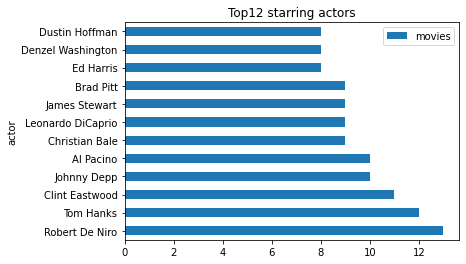

In [45]:
# Γράφημα των παραπάνω στοιχείων
actors_split.rename(columns = {'title': 'movies'}, inplace=True) # μετονομάζω τη στήλη title σε movies για να έχει περισσότερο νόημα το count
actors_split.groupby('actor')[['movies']].count().sort_values('movies', ascending=False)[:12].plot(kind='barh', title='Top12 starring actors')

In [46]:
# θέλω να δω αν σχετίζεται το πλήθος των ταινιών που πρωταγωνιστεί ένας ηθοποιός με το μέσο όρο των βαθμολογιών τους
# Γκρουπάρω ανά ηθοποιό και παίρνω α)το πλήθος των ταινιών που πρωταγωνιστεί και β) το μέσο όρο των βαθμολογιών αυτών των ταινιών
# Σώζω σε νέο dataframe
actors_stats = actors_split.groupby(["actor"]).agg({
  "movies": 'count',
  "star_rating": "mean"
}).sort_values('movies', ascending=False).reset_index() # ταξινομώ ως προς το πλήθος των ταινιών
actors_stats['star_rating'] = actors_stats['star_rating'].round(2) # στρογγυλοποιώ το μέσο όρο σε 2 δεκαδικά
actors_stats

,actor,movies,star_rating
0,Robert De Niro,13,7.97
1,Tom Hanks,12,8.05
2,Clint Eastwood,11,7.99
3,Johnny Depp,10,7.75
4,Al Pacino,10,8.08
...,...,...,...
2005,Kevin Zegers,1,7.50
2006,Kevin Peter Hall,1,7.80
2007,Kerry Washington,1,7.80
2008,Ken Foree,1,8.00


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


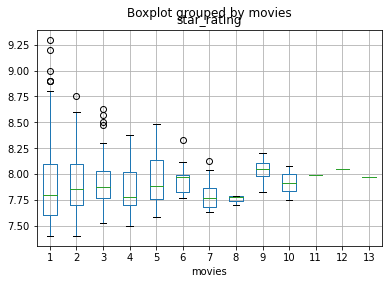

In [47]:
# βλέπουμε τη σχέση μεταξύ πλήθους ταινιών (movies) και βαθμολόγησής τους (star_rating)
actors_stats.boxplot(column='star_rating', by='movies')

Μια πρώτη παρατήρηση είναι ότι έχουμε κάποια outliers στις μέσες τιμές των βαθμολογιών των ταινιών όταν οι ταινίες που πρωταγωνιστεί ένας ηθοποιός είναι 1 ή 3. Στις 11, 12 και 13 ταινίες έχουμε μόνο έναν ηθοποιό.

In [48]:
# Eπειδή όμως υπάρχουν πάρα πολλές καταγραφές με 1 ταινία και πολλές με άλλο αριθμό ταινιών (εκτός από 11, 12 και 13), πρέπει να συγκρίνω με το μ.ο. των βαθμολογιών κάθε πλήθους ταινιών
# Άρα: 
# α) φτιάχνω ένα series γκρουπάροντας ανά πλήθος ταινιών: actors_stats[['movies', 'star_rating']].groupby("movies")
# β) και παίρνοντας το μέσο όρο των βαθμολογιών ανά γκρουπ, στρογγυλεύοντας σε 2 δεκαδικά: ['star_rating'].mean().round(2)
# γ) μετατρέπω το series σε dataframe και το σώζω σαν movies_stars: movies_stars = pd.DataFrame()
# δ) κάνω transpose και reset το index στο dataframe: T.reset_index()
movies_stars = pd.DataFrame([actors_stats[['movies', 'star_rating']].groupby("movies")['star_rating'].mean().round(2)]).T.reset_index()
movies_stars


,movies,star_rating
0,1,7.88
1,2,7.88
2,3,7.91
3,4,7.87
4,5,7.96
5,6,7.95
6,7,7.80
7,8,7.76
8,9,8.03
9,10,7.92


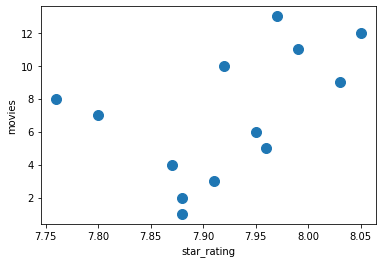

In [49]:
# Ας φτιάξουμε ένα γράφημα για να δούμε αν σχετίζεται το πλήθος των ταινιών που πρωταγωνιστεί ένας ηθοποιός με τη βαθμολογία των ταινιών αυτών
movies_stars.plot.scatter(x = 'star_rating', y = 'movies', s = 100);

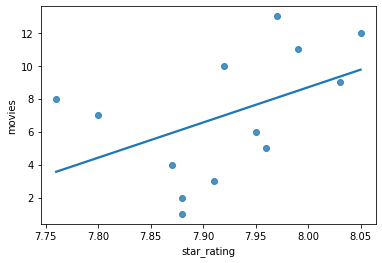

In [50]:
# Το ίδιο γράφημα με seaborn και regression line
sns.regplot(x = "star_rating",
            y = "movies", 
            ci = None,
            data = movies_stars)

**Συμπέρασμα**: Παρότι οι διαφορές στις βαθμολογίες είναι πολύ μικρές, παρατηρούμε ότι γενικά o μ.ο. των βαθμολογιών των ταινιών στις οποίες πρωταγωνιστεί κάποιος ηθοποιός αυξάνεται αναλογικά με το πλήθος τους. Επομένως, αναμένουμε ότι (χωρίς να αποκλείονται οι εξαιρέσεις) μια ταινία με πρωταγωνιστή έναν ηθοποιό από τις ψηλότερα βαθμολογημένες ταινίες είναι πολύ πιθανό να πάρει και αυτή ψηλότερη βαθμολογία. Για να δούμε όμως τι άλλες ενδείξεις έχουμε.

## Ας προσθέσουμε και λίγη στατιστική

In [51]:
# Ας ξαναθυμηθούμε ποιοι 12 ηθοποιοί πρωταγωνιστούν στις περισσότερες ταινίες
actors_stats.head(12)

,actor,movies,star_rating
0,Robert De Niro,13,7.97
1,Tom Hanks,12,8.05
2,Clint Eastwood,11,7.99
3,Johnny Depp,10,7.75
4,Al Pacino,10,8.08
5,Christian Bale,9,8.07
6,Leonardo DiCaprio,9,8.03
7,James Stewart,9,8.20
8,Brad Pitt,9,7.83
9,Ed Harris,8,7.79


In [52]:
# Αν όμως δούμε ποιοι 12 ηθοποιοί παίζουν στις ταινίες με την ψηλότερη βαθμολογία, βλέπουμε ότι οι περισσότεροι έχουν παίξει σε μόνο μία
actors_stats.sort_values('star_rating', ascending=False)[:12]

,actor,movies,star_rating
1463,Bob Gunton,1,9.30
1867,James Caan,1,9.20
1698,Aaron Eckhart,1,9.00
1190,Eli Wallach,1,8.90
1641,Martin Balsam,1,8.90
1073,John Travolta,1,8.90
1156,Ellen Page,1,8.80
445,Marlon Brando,2,8.75
1237,Donna Reed,1,8.70
1959,Keiko Tsushima,1,8.70


In [53]:
# Ας δούμε και τις επιμέρους βαθμολογίες των επιμέρους ταινιών που έχει παίξει ο De Niro που είναι πρώτος
actors_split[actors_split['actor'] == 'Robert De Niro']

,movies,star_rating,actor
0,Goodfellas,8.7,Robert De Niro
0,Once Upon a Time in America,8.4,Robert De Niro
0,Taxi Driver,8.4,Robert De Niro
0,Raging Bull,8.3,Robert De Niro
0,Casino,8.2,Robert De Niro
0,The Deer Hunter,8.2,Robert De Niro
0,A Bronx Tale,7.8,Robert De Niro
0,Awakenings,7.8,Robert De Niro
0,The King of Comedy,7.8,Robert De Niro
0,Midnight Run,7.6,Robert De Niro


In [54]:
# Ας δούμε τα στατιστικά μεγέθη για τις βαθμολογίες των ταινιών του De Niro  
actors_split[actors_split['actor'] == 'Robert De Niro']['star_rating'].describe()

count    13.000000
mean      7.969231
std       0.419095
min       7.400000
25%       7.600000
50%       7.800000
75%       8.300000
max       8.700000
Name: star_rating, dtype: float64

In [55]:
# Ας δούμε τα στατιστικά μεγέθη και για τις βαθμολογίες των ταινιών με έναν ηθοποιό
actors_stats[actors_stats['movies'] == 1]['star_rating'].describe()

count    1522.000000
mean        7.883180
std         0.311039
min         7.400000
25%         7.600000
50%         7.800000
75%         8.100000
max         9.300000
Name: star_rating, dtype: float64

In [56]:
# Μπορούμε να συγκρίνουμε τα δύο αποτελέσματα, αλλά μπορούμε να τα δούμε ακόμα καλύτερα αν φτιάξουμε ένα γράφημα
# Πρώτα φτιάχνουμε τα στατιστικά μεγέθη για τη 1 ταινία...
data1 = actors_stats[actors_stats['movies'] == 1]
data1.reset_index(inplace=True, drop=True)
mean1 = data1['star_rating'].mean()
std1 = data1['star_rating'].std()
min_value1 = data1['star_rating'].min()
max_value1 = data1['star_rating'].max()
cov1 = std1 / mean1 # Coefficient of Variance
print("  For 1 movie: Std = {}, Mean = {},  Min = {}, Max = {}, CoV = {}".format(std1, mean1, min_value1, max_value1, cov1))
# ...και μετά για τις 13 ταινίες
data13 = actors_split[actors_split['actor'] == 'Robert De Niro']
data13.reset_index(inplace=True, drop=True)
mean13 = data13['star_rating'].mean()
std13 = data13['star_rating'].std()
min_value13 = data13['star_rating'].min()
max_value13 = data13['star_rating'].max()
cov13 = std13 / mean13
print("For 13 movies: Std = {}, Mean = {}, Min = {}, Max = {}, CoV = {}".format(std13, mean13, min_value13, max_value13, cov13))

  For 1 movie: Std = 0.3110388614866263, Mean = 7.883180026281232,  Min = 7.4, Max = 9.3, CoV = 0.03945601400065375
For 13 movies: Std = 0.4190954851117172, Mean = 7.9692307692307685, Min = 7.4, Max = 8.7, CoV = 0.05258920179973286


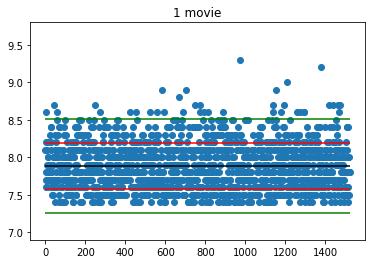

In [57]:
# γράφημα για τη 1 ταινία
plt.title("1 movie")
plt.ylim(min_value1 - 0.5, max_value1 + 0.5)
plt.scatter(x=data1.index, y=data1['star_rating'])
plt.hlines(y=mean1, xmin=0, xmax=len(data1))
plt.hlines(y=mean1 - std1, xmin=0, xmax=len(data1), colors='r')
plt.hlines(y=mean1 + std1, xmin=0, xmax=len(data1), colors='r')
plt.hlines(y=mean1 - 2*std1, xmin=0, xmax=len(data1), colors='g')
plt.hlines(y=mean1 + 2*std1, xmin=0, xmax=len(data1), colors='g')
plt.show()

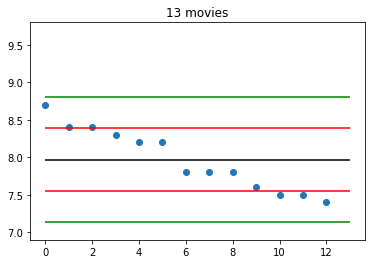

In [58]:
# γράφημα για τις 13 ταινίες
plt.title("13 movies")
plt.ylim(min_value1 - 0.5, max_value1 + 0.5) # για καλύτερη σύγκριση των 2 γραφημάτων έχω χρησιμοποιήσει τα ίδια πάνω και κάτω όρια (της 1 ταινίας) 
plt.scatter(x=data13.index, y=data13['star_rating'])
plt.hlines(y=mean13, xmin=0, xmax=len(data13))
plt.hlines(y=mean13 - std13, xmin=0, xmax=len(data13), colors='r')
plt.hlines(y=mean13 + std13, xmin=0, xmax=len(data13), colors='r')
plt.hlines(y=mean13 - 2*std13, xmin=0, xmax=len(data13), colors='g')
plt.hlines(y=mean13 + 2*std13, xmin=0, xmax=len(data13), colors='g')
plt.show()

**Άρα**: Προφανώς όταν φεύγουμε από τους μέσους όρους, υπάρχουν ταινίες με πολύ ψηλή βαθμολογία με πρωταγωνιστή κάποιον που έχει παίξει σε λίγες ταινίες, ακόμα και σε μόνο μία. Εξετάζοντας τις ταινίες στις οποίες ο ηθοποιός έχει παίξει μόνο σ'αυτή, βλέπουμε ότι η τυπική απόκλιση, αλλά και το coefficient of variance, των βαθμολογιών των ταινιών είναι μικρότερες, αλλά υπάρχουν και κάποιες λίγες ταινίες που ξεφεύγουν από το πάνω όριο της διπλής τυπικής απόκλισης από τη μέση τιμή.

Όπως θα μας έδειχνε και το Machine Learning, **το αν θα πάρει ψηλή βαθμολογία μια ταινία, δεν εξαρτάται μόνο από τον πρωταγωνιστή**

Σε κάθε περίπτωση, δεν πρέπει να ξεχνάμε ότι τα δεδομένα μας περιλαμβάνουν μόνο τις 979 υψηλότερα βαθμολογημένες ταινίες και όχι όλες. O De Niro έχει παίξει και σε πάρα πολλές πατάτες, με βαθμολογία ακόμα και κάτω από 3.5 ([https://www.imdb.com/list/ls096767063/?sort=list_order,desc&st_dt=&mode=detail&page=1](https://)).

Η παρούσα εργασία δεν είναι για εξαγωγή συμπερασμάτων αλλά για εξάσκηση στην python και τα pandas.